# Neural Network 
### forward and backword propagation handcoded using python from SCRATCH

In [148]:
#inspired by https://www.youtube.com/watch?v=LSr96IZQknc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

%matplotlib inline

<img src="images/components.png">

In [89]:
#we will be using iris dataset for binary classification

data = load_iris()
df=pd.DataFrame(data.data)

#include target variable to the DF
df[4]=data.target

#use only the first 100 as we want to predict 1,0
df=df.head(100)

In [90]:
#pareto rule 80:20
ind_train=df.sample(80).index

train = df[df.index.isin(ind_train.values)].values
test  = df[~df.index.isin(ind_train.values)].values

In [91]:
#mixture of 0s and 1s for train set 
train[:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ]])

In [92]:
train[-11:-1]

array([[6. , 3.4, 4.5, 1.6, 1. ],
       [5.6, 3. , 4.1, 1.3, 1. ],
       [5.5, 2.5, 4. , 1.3, 1. ],
       [5.5, 2.6, 4.4, 1.2, 1. ],
       [5. , 2.3, 3.3, 1. , 1. ],
       [5.6, 2.7, 4.2, 1.3, 1. ],
       [5.7, 3. , 4.2, 1.2, 1. ],
       [5.7, 2.9, 4.2, 1.3, 1. ],
       [6.2, 2.9, 4.3, 1.3, 1. ],
       [5.1, 2.5, 3. , 1.1, 1. ]])

In [93]:
#mixture of 0s and 1s to predit
test

array([[4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.7, 3.2, 1.6, 0.2, 0. ],
       [4.9, 3.6, 1.4, 0.1, 0. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6.9, 3.1, 4.9, 1.5, 1. ],
       [5. , 2. , 3.5, 1. , 1. ],
       [6.1, 2.9, 4.7, 1.4, 1. ],
       [6.1, 2.8, 4. , 1.3, 1. ],
       [6.4, 2.9, 4.3, 1.3, 1. ],
       [5.8, 2.7, 3.9, 1.2, 1. ],
       [5.4, 3. , 4.5, 1.5, 1. ],
       [6.7, 3.1, 4.7, 1.5, 1. ],
       [6.3, 2.3, 4.4, 1.3, 1. ],
       [6.1, 3. , 4.6, 1.4, 1. ],
       [5.8, 2.6, 4. , 1.2, 1. ]])

In [94]:
#Shape of rain and Test
print(len(train))
print(len(test))

80
20


In [95]:
#function for sigmoid activation

def sigmoid(x):
    return 1/(1+np.exp(-x))

#sigmoid prime
def sigmoid_p(x): 
    return sigmoid(x)* ( 1 - sigmoid(x))

<img src="images/latex.png">

In [96]:
T = np.linspace( -5,5,50) # from -5 to 5 with 50 subdivisions
sigmoid(T) #it can be observed that sigmoid converts all T to between( 0 and 1)

array([0.00669285, 0.00819568, 0.01003256, 0.01227603, 0.01501357,
       0.01835024, 0.0224116 , 0.02734679, 0.03333169, 0.04057176,
       0.04930426, 0.05979915, 0.07235796, 0.0873094 , 0.10500059,
       0.12578244, 0.14998817, 0.17790412, 0.20973382, 0.24555731,
       0.28529068, 0.32865255, 0.37514569, 0.42406149, 0.47451191,
       0.52548809, 0.57593851, 0.62485431, 0.67134745, 0.71470932,
       0.75444269, 0.79026618, 0.82209588, 0.85001183, 0.87421756,
       0.89499941, 0.9126906 , 0.92764204, 0.94020085, 0.95069574,
       0.95942824, 0.96666831, 0.97265321, 0.9775884 , 0.98164976,
       0.98498643, 0.98772397, 0.98996744, 0.99180432, 0.99330715])

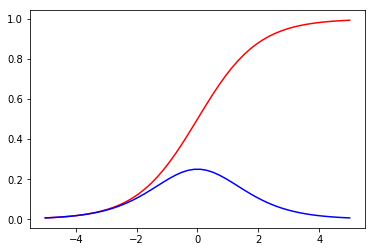

In [97]:
plt.plot(T,sigmoid(T),c='r')
plt.plot(T,sigmoid_p(T),c='b');

In [145]:
#training loop

def training():
    
    #randomly assigns w1,w2,w3,w4,b
    # 4 inputs = 4 weights and 1 bias
    
    #set random so that it's repeatable
    np.random.seed(42)
    
    w1= np.random.randn() #weight 1
    w2= np.random.randn() #weight 2
    w3= np.random.randn() #weight 3
    w4= np.random.randn() #weight 4
    b = np.random.randn() #bias
    
    iterations = 1000 #need to tweak 
    learning_rate = 0.05 #need to tweak 
    costs = [] # keep costs during training, see if they go down

    for i in range(iterations):
        #get a random point
        ri= np.random.randint(len(train))
        point=train[ri] #bootstrap from the train 
        
        #forward propagation
        z= w1*point[0] + w2*point[1] + w3*point[2]++ w4*point[3] + b
        pred = sigmoid(z) #activate z
    
        target = point[4]
        
        # Loss function : cost for current random point
        # Goal : Minimise loss function
        cost = ( pred-target ) **2
        
    # print the cost over all data points every 100 iters
        if i % 100 == 0:
            c = 0
            for j in range(len(train)):
                p = train[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + w3 * p[2] + w4 * p[3] + b)
                c += np.square(p_pred - p[4])
            costs.append(c)

        #backpropagation
        #propogate the error back and update weight and biases
        #finds the extent to which we need to adjust the weights and biases
        dcost_pred = 2 * ( pred - target) *(1) #differentiate cost= ( pred-target ) **2
        dpred_dz = sigmoid_p(z) 
    
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_dw3 = point[2]
        dz_dw4 = point[3]
        dz_db = 1

        dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
        dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
        dcost_dw3 = dcost_pred * dpred_dz * dz_dw3
        dcost_dw4 = dcost_pred * dpred_dz * dz_dw4
        dcost_db  = dcost_pred * dpred_dz * dz_db

        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        w3 = w3 - learning_rate * dcost_dw3
        w4 = w4 - learning_rate * dcost_dw4
        b =  b  - learning_rate * dcost_db

    return costs,w1,w2,w3,w4,b

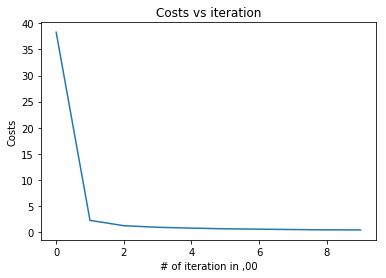

In [147]:
costs,w1,w2,w3,w4,b = training()

#costs is minimized around #2nd iteration ( 2 x 100 = 200)
plt.plot(costs)
plt.title('Costs vs iteration')
plt.xlabel('# of iteration in ,00')
plt.ylabel('Costs');

<img src="images/gd.png">

In [55]:
#predict the last 10 flowers
for i in range(len(test)):
    point=test[i][0:4]
    z= w1*point[0] + w2*point[1] + w3*point[2]++ w4*point[3] + b
    pred = sigmoid(z) #activate z
    print("if close to 0 -> class 0, close to 1 -> class 1")
    print('predict, absolute value : {}'.format(pred))
    print('predict(rounded value) : {}'.format(round(pred,0)))
    print('actual : {}\n\n'.format(test[i][4]))

if close to 0 -> class 0, close to 1 -> class 1
predict, absolute value : 0.018897244187450243
predict(rounded value) : 0.0
actual : 0.0


if close to 0 -> class 0, close to 1 -> class 1
predict, absolute value : 0.02934336982585421
predict(rounded value) : 0.0
actual : 0.0


if close to 0 -> class 0, close to 1 -> class 1
predict, absolute value : 0.035754641821845096
predict(rounded value) : 0.0
actual : 0.0


if close to 0 -> class 0, close to 1 -> class 1
predict, absolute value : 0.02059712458372403
predict(rounded value) : 0.0
actual : 0.0


if close to 0 -> class 0, close to 1 -> class 1
predict, absolute value : 0.013055002641471705
predict(rounded value) : 0.0
actual : 0.0


if close to 0 -> class 0, close to 1 -> class 1
predict, absolute value : 0.00735646193755012
predict(rounded value) : 0.0
actual : 0.0


if close to 0 -> class 0, close to 1 -> class 1
predict, absolute value : 0.031500273676554766
predict(rounded value) : 0.0
actual : 0.0


if close to 0 -> class 0, clos